In [110]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.cluster import KMeans

# load the data

In [111]:
data = pd.read_csv("3.01.+Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# plot the data

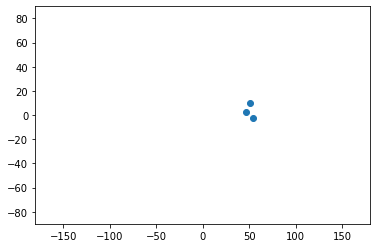

In [112]:
plt.scatter(data['Latitude'],data['Longitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# select the features

In [113]:
x = data.iloc[:,1:3] #starting clustering based on location, so want x to contain latitude and longitude 
#use colon for first arguement because want to use all row indexes 
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# clustering

In [114]:
kmeans = KMeans(3)  #Kmeans method we imported (2) is number of clusters want to produce, 

In [115]:
kmeans.fit(x) #clustering itself happens using the fit method 

KMeans(n_clusters=3)

# clustering results

In [116]:
identifed_clusters = kmeans.fit_predict(x) #predicted clusters for each observation 

In [117]:
identifed_clusters #can see two clusters, first five observations in cluster 0 and last in cluster 1 

array([1, 1, 2, 2, 2, 0])

In [118]:
data_with_clusters = data.copy()

In [119]:
data_with_clusters['cluster'] = identifed_clusters

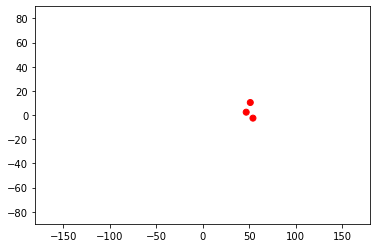

In [120]:
plt.scatter(data_with_clusters['Latitude'], data_with_clusters['Longitude'], c = data_with_clusters['cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90) 
plt.show()

# map the data

In [121]:
data_mapped = data.copy() #not optimal way to code
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2 })
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [122]:
#next choose features we want to use for clustering 
x = data_mapped.iloc[:, 3:4]

In [123]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


# selecting the number of clusters

# WCSS

In [124]:
kmeans.inertia_

288.10523333333333

In [125]:
wcss =[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [126]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

# The Elbow Method

In [127]:
number_of_clusters = range(1,7)

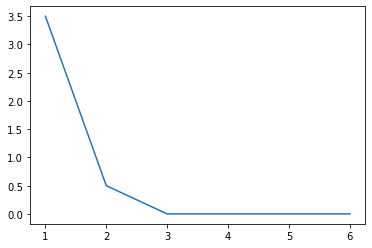

In [128]:
plt.plot(number_of_clusters, wcss) #3 cluster solution is better, 2 cluster is suboptimal 